
Library Management Menu:
1. View All Books
2. Add a Book
3. Remove a Book
4. Update a Book
5. Borrow a Book
6. Return a Book
7. Search for a Book
8. View Statistics and Visualizations
9. Export Search Results
10. Exit
Enter your choice (1-10): 8
Statistics and Visualizations:
Library Analysis:
Total number of books: 3
Most borrowed genre: Classic
Average borrowing duration: 15.00 days
Do you want to view the most borrowed genre? (Yes/No): Yes
The most borrowed genre is: Classic


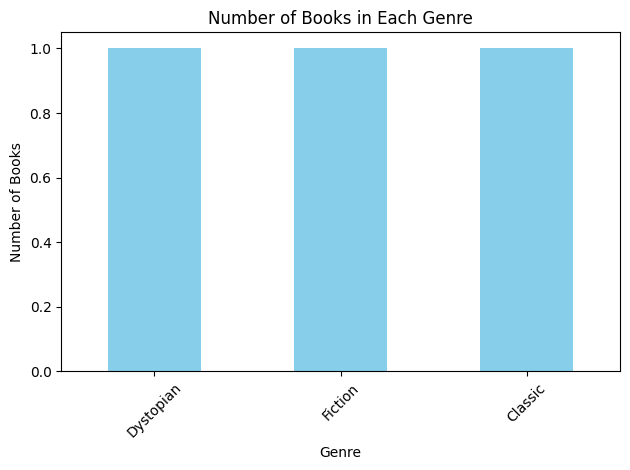

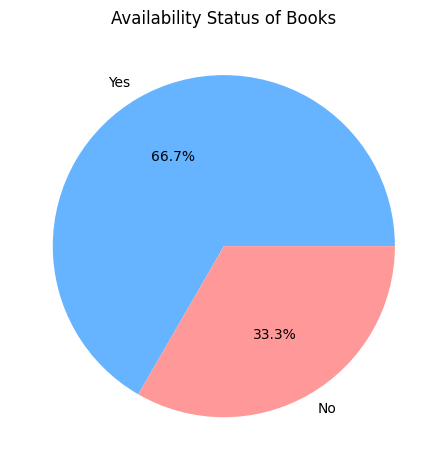


Library Management Menu:
1. View All Books
2. Add a Book
3. Remove a Book
4. Update a Book
5. Borrow a Book
6. Return a Book
7. Search for a Book
8. View Statistics and Visualizations
9. Export Search Results
10. Exit


In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import re
import matplotlib.pyplot as plt

# Load or initialize library data
try:
    library_df = pd.read_csv("library_inventory.csv")
except FileNotFoundError:
    data = {
        "Book ID": ["BK-001", "BK-002", "BK-003"],
        "Title": ["1984", "To Kill a Mockingbird", "The Great Gatsby"],
        "Author": ["George Orwell", "Harper Lee", "F. Scott Fitzgerald"],
        "Genre": ["Dystopian", "Fiction", "Classic"],
        "Availability": ["Yes", "Yes", "No"],
        "Borrower": [None, None, "John Doe"],
        "Borrow Duration (days)": [0, 0, 15]
    }
    library_df = pd.DataFrame(data)
    library_df.to_csv("library_inventory.csv", index=False)

def save_changes():
    library_df.to_csv("library_inventory.csv", index=False)
    print("Changes saved to library_inventory.csv.")

def export_data(filtered_df, filename):
    filtered_df.to_csv(filename, index=False)
    print(f"Data exported to {filename}.")

def display_library():
    print("Library Data:")
    print(tabulate(library_df, headers='keys', tablefmt='grid', showindex=False))

def is_valid_book_id(book_id):
    return bool(re.match(r"^BK-\d{3}$", book_id))

def add_book(book_id, title, author, genre, availability, borrower=None, borrow_duration=0):
    global library_df
    if not is_valid_book_id(book_id):
        print("Invalid book ID format. Please use 'BK-001', 'BK-002', etc.")
        return
    new_book = {
        "Book ID": book_id,
        "Title": title,
        "Author": author,
        "Genre": genre,
        "Availability": availability,
        "Borrower": borrower,
        "Borrow Duration (days)": borrow_duration
    }
    library_df = pd.concat([library_df, pd.DataFrame([new_book])], ignore_index=True)
    save_changes()
    print(f"Book '{title}' added successfully.")

def remove_book(book_id):
    global library_df
    if not is_valid_book_id(book_id):
        print("Invalid book ID format. Please use 'BK-001', 'BK-002', etc.")
        return
    if book_id in library_df["Book ID"].values:
        library_df = library_df[library_df["Book ID"] != book_id]
        save_changes()
        print(f"Book with ID {book_id} removed successfully.")
    else:
        print(f"Book with ID {book_id} not found.")

def update_book(book_id, availability=None, borrower=None, borrow_duration=None):
    global library_df
    if not is_valid_book_id(book_id):
        print("Invalid book ID format. Please use 'BK-001', 'BK-002', etc.")
        return
    if book_id in library_df["Book ID"].values:
        if availability:
            library_df.loc[library_df["Book ID"] == book_id, "Availability"] = availability
        if borrower:
            library_df.loc[library_df["Book ID"] == book_id, "Borrower"] = borrower
        if borrow_duration is not None:
            library_df.loc[library_df["Book ID"] == book_id, "Borrow Duration (days)"] = borrow_duration
        save_changes()
        print(f"Book with ID {book_id} updated successfully.")
    else:
        print(f"Book with ID {book_id} not found.")

def borrow_book(book_id, borrower_name, borrow_duration):
    global library_df
    if not is_valid_book_id(book_id):
        print("Invalid book ID format. Please use 'BK-001', 'BK-002', etc.")
        return
    if book_id in library_df["Book ID"].values:
        book = library_df[library_df["Book ID"] == book_id]
        if book["Availability"].values[0] == "Yes":
            library_df.loc[library_df["Book ID"] == book_id, "Availability"] = "No"
            library_df.loc[library_df["Book ID"] == book_id, "Borrower"] = borrower_name
            library_df.loc[library_df["Book ID"] == book_id, "Borrow Duration (days)"] = borrow_duration
            save_changes()
            print(f"Book with ID {book_id} has been borrowed by {borrower_name}.")
        else:
            print(f"Book with ID {book_id} is currently unavailable.")
    else:
        print(f"Book with ID {book_id} not found.")

def return_book(book_id):
    global library_df
    if not is_valid_book_id(book_id):
        print("Invalid book ID format. Please use 'BK-001', 'BK-002', etc.")
        return
    if book_id in library_df["Book ID"].values:
        book = library_df[library_df["Book ID"] == book_id]
        if book["Borrower"].values[0] is not None:
            library_df.loc[library_df["Book ID"] == book_id, "Availability"] = "Yes"
            library_df.loc[library_df["Book ID"] == book_id, "Borrower"] = None
            library_df.loc[library_df["Book ID"] == book_id, "Borrow Duration (days)"] = 0
            save_changes()
            print(f"Book with ID {book_id} has been returned.")
        else:
            print(f"Book with ID {book_id} was not borrowed.")
    else:
        print(f"Book with ID {book_id} not found.")

def generate_data_visualization():
    global library_df
    genre_counts = library_df["Genre"].value_counts()
    genre_counts.plot(kind='bar', title='Number of Books in Each Genre', color='skyblue')
    plt.xlabel('Genre')
    plt.ylabel('Number of Books')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    availability_counts = library_df["Availability"].value_counts()
    availability_counts.plot(kind='pie', title='Availability Status of Books', autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

def analyze_library():
    global library_df
    total_books = len(library_df)
    most_borrowed_genre = library_df[library_df["Availability"] == "No"]["Genre"].mode().iloc[0] if not library_df[library_df["Availability"] == "No"].empty else "None"
    average_borrow_duration = np.mean(library_df[library_df["Availability"] == "No"]["Borrow Duration (days)"])

    print("Library Analysis:")
    print(f"Total number of books: {total_books}")
    print(f"Most borrowed genre: {most_borrowed_genre}")
    print(f"Average borrowing duration: {average_borrow_duration:.2f} days")
    return most_borrowed_genre

def search_books(query, column):
    global library_df
    filtered_books = library_df[library_df[column].str.contains(query, case=False, na=False)]
    print(f"Search Results for {query} in {column.capitalize()}:")
    print(tabulate(filtered_books, headers='keys', tablefmt='grid', showindex=False))
    return filtered_books

while True:
    print("\nLibrary Management Menu:")
    print("1. View All Books")
    print("2. Add a Book")
    print("3. Remove a Book")
    print("4. Update a Book")
    print("5. Borrow a Book")
    print("6. Return a Book")
    print("7. Search for a Book")
    print("8. View Statistics and Visualizations")
    print("9. Export Search Results")
    print("10. Exit")

    choice = input("Enter your choice (1-10): ")

    if choice == "1":
        display_library()
    elif choice == "2":
        book_id = input("Enter the book ID (e.g., BK-001): ")
        title = input("Enter the book title: ")
        author = input("Enter the author: ")
        genre = input("Enter the genre: ")
        availability = input("Enter availability (Yes/No): ")
        borrower = input("Enter borrower name (if borrowed, else press Enter): ") or None
        borrow_duration = int(input("Enter borrow duration in days (if borrowed, else enter 0): "))
        add_book(book_id, title, author, genre, availability, borrower, borrow_duration)
    elif choice == "3":
        book_id = input("Enter the book ID to remove (e.g., BK-001): ")
        remove_book(book_id)
    elif choice == "4":
        book_id = input("Enter the book ID to update (e.g., BK-001): ")
        availability = input("Enter new availability (Yes/No, leave blank to skip): ") or None
        borrower = input("Enter new borrower name (leave blank to skip): ") or None
        borrow_duration = input("Enter new borrow duration in days (leave blank to skip): ")
        borrow_duration = int(borrow_duration) if borrow_duration else None
        update_book(book_id, availability, borrower, borrow_duration)
    elif choice == "5":
        book_id = input("Enter the book ID to borrow (e.g., BK-001): ")
        borrower_name = input("Enter borrower's name: ")
        borrow_duration = int(input("Enter borrow duration in days: "))
        borrow_book(book_id, borrower_name, borrow_duration)
    elif choice == "6":
        book_id = input("Enter the book ID to return (e.g., BK-001): ")
        return_book(book_id)
    elif choice == "7":
        print("Search Options:")
        print("1. Search by Title")
        print("2. Search by Author")
        print("3. Search by Genre")
        sub_choice = input("Choose an option (1-3): ")
        if sub_choice == "1":
            query = input("Enter the title to search: ")
            filtered = search_books(query, "Title")
        elif sub_choice == "2":
            query = input("Enter the author to search: ")
            filtered = search_books(query, "Author")
        elif sub_choice == "3":
            query = input("Enter the genre to search: ")
            filtered = search_books(query, "Genre")
        else:
            print("Invalid choice.")
    elif choice == "8":
        print("Statistics and Visualizations:")
        most_borrowed_genre = analyze_library()
        view_genre = input("Do you want to view the most borrowed genre? (Yes/No): ").strip().lower()
        if view_genre == "yes":
            print(f"The most borrowed genre is: {most_borrowed_genre}")
        generate_data_visualization()
    elif choice == "9":
        if 'filtered' in locals() and not filtered.empty:
            filename = input("Enter the filename to export (e.g., search_results.csv): ")
            export_data(filtered, filename)
        else:
            print("No search results available to export.")
    elif choice == "10":
        print("Exiting... Goodbye!")
        break
    else:
        print("Invalid choice. Please try again.")
